<a href="https://colab.research.google.com/github/SelvamathanS/Cifar10/blob/main/Cifar_10_classfication_using_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import tensorflow.keras.backend as K

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

print("Train shape:", X_train.shape)  # (50000, 32, 32, 3)
print("Test shape:", X_test.shape)



Train shape: (50000, 32, 32, 3)
Test shape: (10000, 32, 32, 3)


In [ ]:
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 38ms/step - accuracy: 0.2653 - loss: 2.0958 - val_accuracy: 0.3597 - val_loss: 1.7822
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 37ms/step - accuracy: 0.3832 - loss: 1.7123 - val_accuracy: 0.4028 - val_loss: 1.6912
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 35ms/step - accuracy: 0.4200 - loss: 1.6233 - val_accuracy: 0.4111 - val_loss: 1.6395
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.4392 - loss: 1.5633 - val_accuracy: 0.4488 - val_loss: 1.5742
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - accuracy: 0.4635 - loss: 1.5103 - val_accuracy: 0.4477 - val_loss: 1.5671
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 35ms/step - accuracy: 0.4763 - loss: 1.4684 - val_accuracy: 0.4642 - val_loss: 1.5220
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.4844 - loss: 1.4457 - val_accuracy: 0.4623 - val_loss: 1.5215
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.4933 - loss: 1.4129 - 

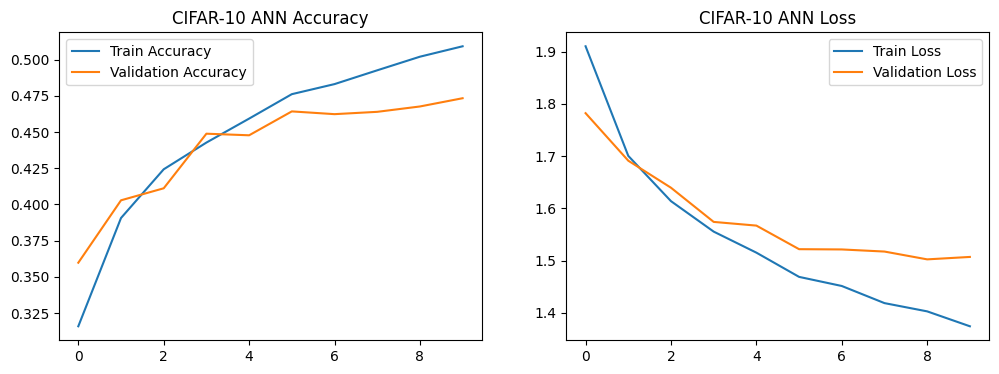

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CIFAR-10 ANN Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CIFAR-10 ANN Loss')
plt.legend()

plt.show()


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4739 - loss: 1.4776
Test Accuracy: 0.47600001096725464


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Predicted: Ship
Actual: Ship


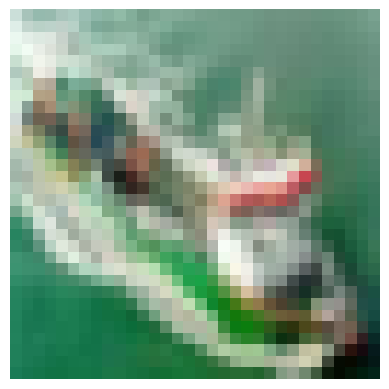

In [ ]:
class_names = ['Airplane','Automobile','Bird','Cat','Deer',
               'Dog','Frog','Horse','Ship','Truck']

idx = 15
img = X_test[idx]

plt.imshow(img)
plt.axis('off')

prediction = model.predict(img.reshape(1,32,32,3))
print("Predicted:", class_names[np.argmax(prediction)])
print("Actual:", class_names[y_test[idx][0]])
